In [1]:
#importing all the necessary libraries
import eda as eda
import dataframe as df
import visualize as v
import seaborn as sns
import train as t
import pandas as pd

In [3]:
boston_df = df.get_boston()

In [4]:
#boston_df

In [4]:
boston_df = eda.del_cols(boston_df,['Unnamed: 0'])
feature_boston_df= df.get_feature_df(boston_df,['Price'])
target_boston_df = df.get_target_df(boston_df,['Price'])

In [5]:
print(feature_boston_df.shape)
print(target_boston_df.shape)

(506, 13)
(506, 1)


There are 14 attributes in each case of the dataset. They are:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [6]:
#checking null values and information about columns
eda.get_missing_values(boston_df)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [7]:
eda.get_categorical_cols(feature_boston_df)

['CHAS', 'RAD']

In [8]:
eda.get_numerical_cols(feature_boston_df)

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

<Figure size 2000x800 with 0 Axes>

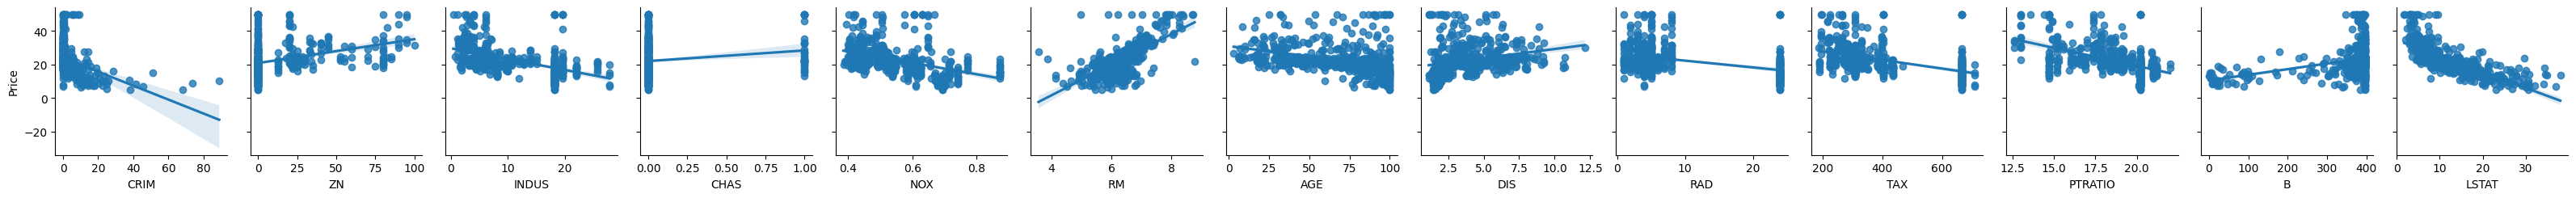

In [10]:
#get_lmplot(boston_df,boston_df_features,'Price') - #giving correct result 
#eda.get_heatmap(boston_df) # giving correct result for continuous target variable
eda.get_pairgrid(boston_df,feature_boston_df,target_boston_df)

In [9]:
num_cols, cat_cols = t.get_cols(feature_boston_df)
model,y_test,y_pred = t.model_pipeline(feature_boston_df,target_boston_df,num_cols=num_cols,cat_cols=cat_cols,task='linear_regression')

In [10]:
t.evaluate_model(y_test,y_pred,'regression')

{'MAPE': 'MAPE is: 17.43950342638785', 'MSE': 24.81844273848124}

In [ ]:
y_pred = y_pred.ravel() #ravel of ndarray
y_test = y_test.values.ravel() #method of ravel on data frame

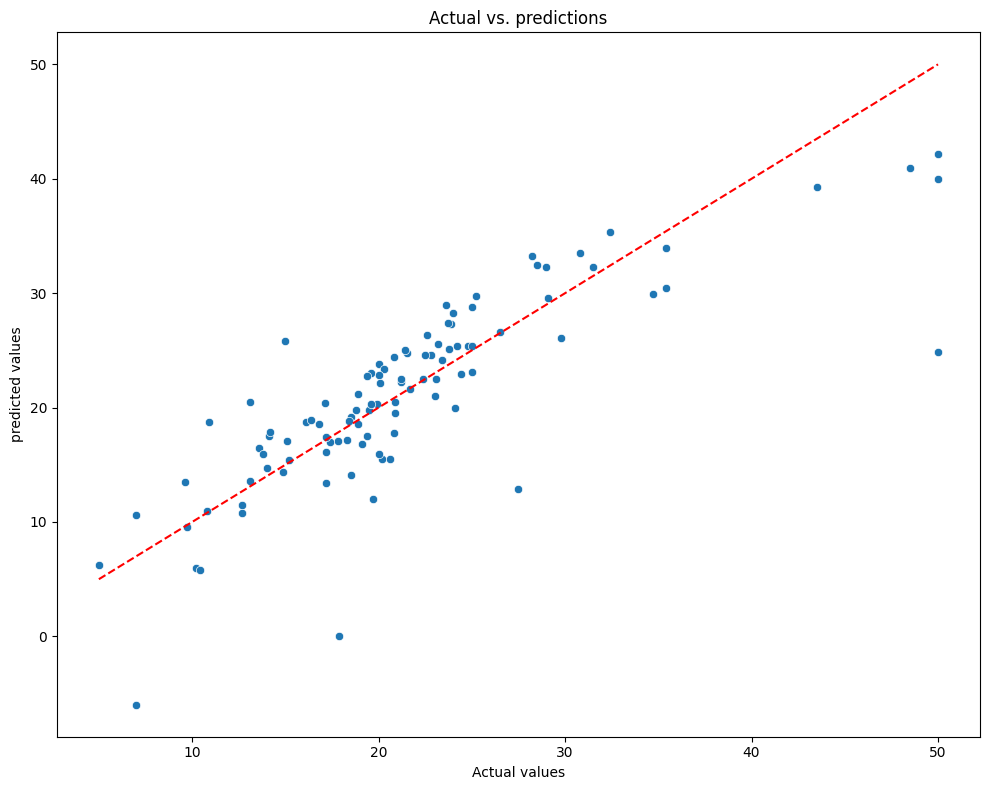

In [13]:
v.plot_actual_vs_predicted(y_test=y_test,y_pred=y_pred)

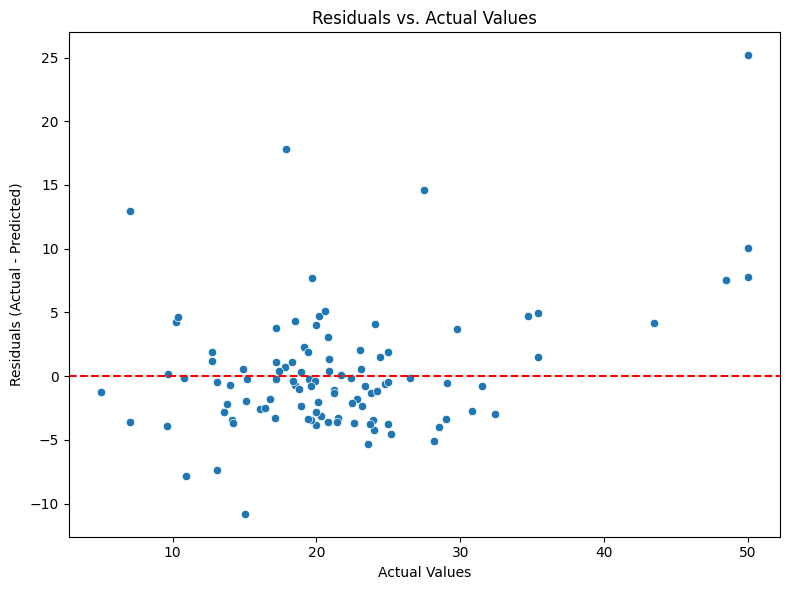

In [14]:
v.plot_residuals(y_test,y_pred)

In [15]:
t.get_MAPE(y_test,y_pred)*100#finding out MAPE

17.43950342638785

In [16]:
num_cols

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [17]:
print(t.get_training_error(feature_boston_df,target_boston_df,num_cols, cat_cols))

15.96293847776826


In [36]:
print(t.get_lasso_mape(1,feature_boston_df,target_boston_df))
print(t.get_ridge_mape(0.1,feature_boston_df,target_boston_df))
print(t.get_elasticnet_mape(0.001,feature_boston_df,target_boston_df))

19.64442543251435
22.06981712417115
21.867283522627318


lasso, ridge and elasticnet is worse than linear regression, hence we will continue to use linear regression

Trying with classification dataset


In [2]:
churn_df = df.get_churn_df()

In [3]:
churn_df = eda.del_cols(churn_df,'customerID')
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'].values,errors='coerce')

In [4]:
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
eda.get_missing_values(churn_df)

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
churn_df_new = eda.drop_null_values(churn_df)

In [8]:
churn_df_new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [7]:
target_churn_df = df.get_target_df(churn_df_new,['Churn'])
target_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Churn   7032 non-null   object
dtypes: object(1)
memory usage: 109.9+ KB


In [8]:
feature_churn_df = df.get_feature_df(churn_df_new,['Churn'])
feature_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [9]:
num_cols = eda.get_numerical_cols(feature_churn_df)
cat_cols = eda.get_categorical_cols(feature_churn_df)

In [11]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [12]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

Classification Report

In [10]:
model_knn,y_test_knn,y_pred_knn = t.model_pipeline(feature_churn_df,target_churn_df,num_cols,cat_cols,'knn')
report_knn=t.evaluate_model(y_test_knn,y_pred_knn,'knn')
print(report_knn)

              precision    recall  f1-score   support

          No       0.82      0.84      0.83      1033
         Yes       0.53      0.50      0.52       374

    accuracy                           0.75      1407
   macro avg       0.68      0.67      0.67      1407
weighted avg       0.75      0.75      0.75      1407



In [11]:
model_dt,y_test_dt,y_pred_dt = t.model_pipeline(feature_churn_df,target_churn_df,num_cols,cat_cols,'decision_tree')
report_dt = t.evaluate_model(y_test_dt,y_pred_dt,'decision_tree')
print(report_dt)

              precision    recall  f1-score   support

          No       0.81      0.80      0.80      1033
         Yes       0.46      0.48      0.47       374

    accuracy                           0.71      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.71      0.72      1407



In [12]:
model_rf,y_test_rf,y_pred_rf = t.model_pipeline(feature_churn_df,target_churn_df,num_cols,cat_cols,'randon_forest')
report_rf = t.evaluate_model(y_test_rf,y_pred_rf,'random_forest')
print(report_rf)

              precision    recall  f1-score   support

          No       0.82      0.89      0.86      1033
         Yes       0.61      0.46      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407



In [13]:
model_nb,y_test_nb,y_pred_nb = t.model_pipeline(feature_churn_df,target_churn_df,num_cols,cat_cols,'naive_bayes')
report_nb = t.evaluate_model(y_test_nb,y_pred_nb,'naive bayes')
print(report_nb)

              precision    recall  f1-score   support

          No       0.91      0.68      0.77      1033
         Yes       0.47      0.81      0.60       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.71      0.73      1407



In [14]:
model_sv,y_test_sv,y_pred_sv = t.model_pipeline(feature_churn_df,target_churn_df,num_cols,cat_cols,'svm')
report_sv = t.evaluate_model(y_test_sv,y_pred_sv,'svm')
print(report_sv)

              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1033
         Yes       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [15]:
model_lrc,y_test_lrc,y_pred_lrc = t.model_pipeline(feature_churn_df,target_churn_df,num_cols,cat_cols,'logistic_regression')
report_lrc = t.evaluate_model(y_test_lrc,y_pred_lrc,'logistic_regression')
print(report_lrc)

              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1033
         Yes       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

